In [1]:
import numpy as np
import pandas as pd
from scipy import stats, special
import matplotlib.pyplot as plt
import math

# Beschreibende Statistik

In [2]:
daten = [14, 15, 17, 18, 19, 22, 24, 29, 36, 41]
daten = [8, 7,5,10,6,3,9,7]
daten = [5,7,4,25]

In [3]:
# Mittelwert, Median, Modalwert
print("Mean: " + str(np.mean(daten)))
print("Median: " + str(np.median(daten)))
print("Modalwert: " + str(stats.mode(daten)))

Mean: 10.25
Median: 6.0
Modalwert: ModeResult(mode=array([4]), count=array([1]))


In [4]:
# Varianz, Standardabweichung, Spannweite
# daten = [-2, -1, 0, 1, 2]
print("empirische Varianz/Stichprobenvarianz: " + str(np.var(daten, ddof=1)))
print("Standardabweichung: " + str(np.std(daten, ddof=1)))
print("Spannweite: " + str(np.max(daten) - np.min(daten)))

empirische Varianz/Stichprobenvarianz: 98.25
Standardabweichung: 9.912113800799505
Spannweite: 21


In [5]:
# Perzentile, Quantile
print(np.percentile(daten, 100, interpolation="midpoint"))
print(np.quantile(daten, 0.9, interpolation="midpoint"))

25.0
16.0


In [6]:
# Interquartilabstand
print(np.percentile(daten, 75, interpolation="midpoint") - np.percentile(daten, 25, interpolation="midpoint"))

11.5


# Multivariate Daten

In [7]:
X = np.array([ [8/38, 10/38, 0, 18/38],
               [10/38, 8/38, 0, 18/38],
               [0, 0, 2/38, 2/38]
             ])

np.cov(X, ddof=1)

array([[ 3.78578024e-02,  3.69344414e-02, -5.44603861e-20],
       [ 3.69344414e-02,  3.78578024e-02, -5.44603861e-20],
       [-5.44603861e-20, -5.44603861e-20,  9.23361034e-04]])

In [8]:
df = pd.DataFrame({
    'a': pd.Series([1, 2, 3, 4], dtype='int'), 
    'b': pd.Series([2, 3, 4, 5], dtype='int')
    })

In [9]:
df = pd.DataFrame({
    'a': pd.Series([163, 165, 166]), 
    'b': pd.Series([3900, 2100, 3600])
    })

In [10]:
# Standardabweichung
print(df['a'].std(ddof=1))
print(df['b'].std(ddof=1))


# empirische Kovarianz
print((df.cov()))

1.5275252316519465
964.3650760992955
            a         b
a    2.333333    -500.0
b -500.000000  930000.0


In [11]:
# Korrelationskoeffizient
print(np.corrcoef(df['a'], df['b']))
print(np.corrcoef(df['a'], df['b'])[0, 1])
# Bestimtheitsmaß ist Quadrat des Korrelationskoeffizienten

[[ 1.         -0.33942212]
 [-0.33942212  1.        ]]
-0.3394221166510653


In [12]:
# Korrelationskoeffizient von Hand (Kovarianz durch Standardabewichungen)
print(df.cov() / (df['a'].std(ddof=1) * df['b'].std(ddof=1)))

          a           b
a  0.001584   -0.339422
b -0.339422  631.325137


In [18]:
# Lineare Regression
res = stats.linregress(df['a'], df['b'])
print(res)

LinregressResult(slope=-214.28571428571428, intercept=38485.71428571428, rvalue=-0.3394221166510653, pvalue=0.7795369976249112, stderr=593.8459911664722)


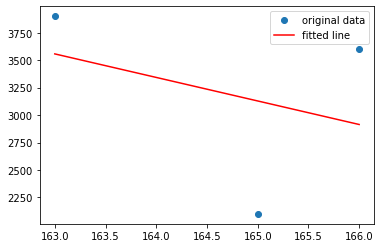

In [19]:
plt.plot(df['a'], df['b'], 'o', label='original data')
plt.plot(df['a'], res.intercept + res.slope*df['a'], 'r', label='fitted line')
plt.legend()
plt.show()

# Diskrete Wahrscheinlichkeitsverteilungen

In [20]:
#Fakultät
n = 5
math.factorial(n)

120

In [21]:
# Binomialkoeffizient (n über k)
n = 5
k = 2
special.binom(n, k)

10.0

In [22]:
#Binomialverteilung (Warscheinlichkeit für t-Erfolge in n-Versuchen)
p = 0.75 #Erfolgswarscheinlichkeit
n = 10 #Anzahl aller Versuche
k = 4 #Anzahl Erfolge
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk') #Erwartungswert/Varianz der Trefferzahl bei n Versuchen
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print(stats.binom.pmf(k,n,p)) #Warsch für zwei Erfolge aus n Versuchen  / Auch Array Möglich (Für Plot)
print(1 - stats.binom.cdf(k,n,p))

Erwartungswert: 7.5
Varianz: 1.875
0.016222000122070344
0.9802722930908203


In [23]:
#Geometrische Verteilung (Wartezeit bis zum ersten Erfolg^)
#Wie groß ist Warsch, dass Max im genau 3. Versuch erfolg hat
p = 0.25   #Erfolgswarscheinlichkeit
k = 5 #Erster Erfolg bei welche Versuch
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk') #Erwartungswert der Abfahrt bis zum ersten Erfolg./ Varianz für Anzahl Abfahrten bis zum ersten Erfolg
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print(stats.geom.pmf(k,p)) #Warsch bei genau n. Versuch erster Erfolg  / Auch Array Möglich (Für Plot)
print(stats.geom.cdf(k,p)) #Warsch höchstens n Versuche für ersten Erfolg


Erwartungswert: 4.0
Varianz: 12.0
0.0791015625
0.7626953125


In [24]:
#Hypergeometrische Verteilung
N = 120 #Anzahl Grundgesamtheit
M = 20 #Anzahl mit bestimmter/gewünschter Eigenschaft
n = 10 #Entnehmen Stichprobe von n (ohne Zurücklegen)
k = 0 #Anzahl Elemente aus Stichprobe die gewünschte Eigenschaft erfüllen sollen
mean, var, skew, kurt = stats.hypergeom.stats(N, M, n, moments='mvsk') #Erwartungswert/Varianz bei n,N & M
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print(stats.hypergeom.pmf(k, N, M, n))
print(stats.hypergeom.cdf(k, N, M, n))
print(stats.hypergeom.sf(k, N, M, n)) # 1-CDF

Erwartungswert: 1.6666666666666665
Varianz: 1.2838468720821663
0.149139149588214
0.149139149588214
0.8508608504117813


In [25]:
#Poissonverteilung
mu = 20 #Auftrittsrate (z.B. durchschnittlich 3.4 mal Pro Woche (Mittelwert))
k = 14 #Anzahl an Auftritten
mean, var, skew, kurt = stats.poisson.stats(mu, moments='mvsk')
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print(stats.poisson.pmf(k, mu)) #Warsch für tritt 2 Mal auf wenn Rate 3.4
print(stats.poisson.cdf(k, mu)) #Warsch für tritt höchstens 2 Mal auf wenn Rate 3.4

Erwartungswert: 20.0
Varianz: 20.0
0.03873664014881865
0.10486428110798468


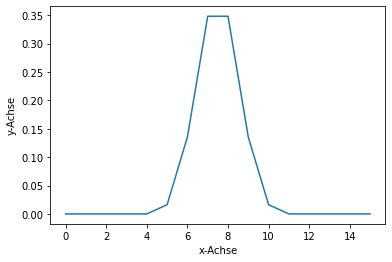

In [26]:
#Allgemeiner Plot von 2 Arrays am Bsp Hypergeometrische Verteilung
N = 20 #Anzahl Grundgesamtheit
M = 15 #Anzahl mit bestimmter/gewünschter Eigenschaft
n = 10 #Entnehmen Stichprobe von n (ohne Zurücklegen)
k = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] #Alle Anzahlen von Elemente aus Stichprobe die gewünschte Eigenschaft erfüllen sollen
ps = stats.hypergeom.pmf(k, N, M, n)
plt.plot(k,ps)
plt.xlabel("x-Achse")
plt.ylabel("y-Achse")
plt.show()

# Kontinuierliche Wahrscheinlichkeitsverteilungen

In [27]:
#Gleichverteilung (wenn Verteilung immer gleich oder unbekannt oder maximal zufällig)
a = 5 #untere Grenze
scale = 20 #obere Grenze minus untere Grenze
x = 0.1 #Warsch dass unter 60
q = 0.1 #Warscheinlichkeit für ppf Funktion wenn Warsch schon gegeben
mean, var, skew, kurt = stats.uniform.stats(a, scale, moments='mvsk') #Erwartungswert/Varianz der Verteilung
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print("pdf: " + str(stats.uniform.pdf(x, a, scale))) #Warscheinlichkeitsdichte (eigentlich keinen Nutzen)
print("cdf: " + str(stats.uniform.cdf(x, a, scale))) #Verteilungsfunktion (Warsch für höchstens bis x)
print("1-cdf: " + str(stats.uniform.sf(x, a, scale))) #automatisch 1-CDF (also für Warsch für mindestens/mehr als...)
print("inv: " + str(stats.uniform.ppf(q, a, scale))) #automatische Inverse von CDF (Also wenn Warsch schon gegeben und x muss berechent werden)

Erwartungswert: 15.0
Varianz: 33.33333333333333
pdf: 0.0
cdf: 0.0
1-cdf: 1.0
inv: 7.0


In [28]:
#Exponentialverteilung (Verwendung bei Zeitintervallen) (Mittlere Zeit zwischen zwei Anforderungen: 1/Lambda) 
scale = 18 #Mittlere Zeit zwischen Anforderungen
lam = 1/2 #Lambda laut definition
scale = 1/lam #Wenn lamda gegeben ist scale ausrechenen
x = 15 #x = 
q = 0.6 #Warscheinlichkeit für ppf Funktion wenn Warsch schon gegeben
mean, var, skew, kurt = stats.expon.stats(scale, moments='mvsk') #Erwartungswert/Varianz der Verteilung
print("Achtung Erwartungswert und Varianz stimmt nicht, von Hand ausrechnen!")
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print("pdf: " + str(stats.expon.pdf(x, scale=scale))) #Warscheinlichkeitsdichte (eigentlich kein Nutzen)
print("cdf: " + str(stats.expon.cdf(x, scale=scale))) #Verteilungsfunktion (Warsch für höchstens bis x)
print("1-cdf: " + str(stats.expon.sf(x, scale=scale))) #automatische 1-CDF (Also für Warsch für mindestens/mehr als...)
print("inv: " + str(stats.expon.ppf(q, scale=scale))) #automatische Inverse von CDF (Also wenn Warsch schon gegeben und x muss berechent werden)

Achtung Erwartungswert und Varianz stimmt nicht, von Hand ausrechnen!
Erwartungswert: 3.0
Varianz: 1.0
pdf: 0.0002765421850739168
cdf: 0.9994469156298522
1-cdf: 0.0005530843701478336
inv: 1.83258146374831


In [29]:
#Normalverteilung
u = 2.5 #Erwartungswert
o = np.sqrt(1**2 + 1**2) #Standardabweichung
x = 2 #X-Wert
q = 0.05 #Warscheinlichkeit für ppf Funktion wenn Warsch schon gegeben
mean, var, skew, kurt = stats.norm.stats(u, o, moments='mvsk') #Erwartungswert/Varianz der Verteilung
print("Erwartungswert: " + str(mean) + "\nVarianz: " + str(var))
print("pdf: " + str(stats.norm.pdf(x, u, o))) #Warscheinlichkeitsdichte (eigentlich kein Nutzen)
print("cdf: " + str(stats.norm.cdf(x, u, o))) #Verteilungsfunktion (Warsch für höchstens bis x)
print("1-cdf: " + str(stats.norm.sf(x, u, o))) #automatische 1-CDF (Also für Warsch für mindestens/mehr als...)
print("inv: " + str(stats.norm.ppf(q, u, o))) #automatische Inverse von CDF (Also wenn Warsch schon gegeben und x muss berechent werden)

Erwartungswert: 2.5
Varianz: 2.0000000000000004
pdf: 0.26500353234402857
cdf: 0.36183680491588155
1-cdf: 0.6381631950841185
inv: 0.1738256926466515


In [30]:
#Standardnormalverteilung
u = 180.3 #Erwartungswert
o = 7.17 #Standardabweichung
x = 175 #x-Wert
print(stats.norm.cdf(x, u, o)) #normale Normalverteilung
def stand_norm(x, u, o):
    z = (x - u)/o
    result = stats.norm.cdf(abs(z), 0, 1) #standardnormalverteilung (Auch aus Tabelle ablesbar)
    if z < 0:
        result = 1 - result
    return result
print(stand_norm(x, u, o))

0.22989549011167337
0.22989549011167343


In [31]:
#Normalverteilung Additionssatz
ux = 150 #Erwartungswert von X (ZV)
ox = 20 #Standardabweichung von X
uy = 190 #Erwartungswert von Y (ZV)
oy = math.sqrt(500) #Standardabweichung von Y
x = 380  #Wert
print(stats.norm.cdf(x, ux+uy, math.sqrt(ox**2 + oy**2))) #Verteilungsfunktion (Warsch für höchstens bis x)

0.9087887802741321


In [32]:
#Abschätzung Binomial durch Normalverteilung
p = 0.00001 #Erfolgswarscheinlichkeit
n = 10000000 #Anzahl aller Versuche
k = 90 #Anzahl Erfolge
print(stats.binom.sf(k,n,p)) #Lösung mit Binomialverteilung
print(stats.norm.sf(k+0.5, n*p, math.sqrt(n*p*(1-p)))) #Lösung mit Normalverteilung

0.8286161336305926
0.8289450804783648


In [33]:
#Abschätzung Poisson durch Normalverteilung
mu = 20 #Auftrittsrate
k = 14 #Anzahl an Auftritten
print(stats.poisson.cdf(k, mu)) #Lösung mit Poisson
print(stats.norm.cdf(k+0.5, mu, math.sqrt(mu))) #Lösung mit Normalverteilung

0.10486428110798468
0.10937900226669622


In [34]:
class my_pdf(stats.rv_continuous):
    def _pdf(self,x):
        return 0.5*x  # Normalized over its range, in this case [0,1]

my_cv = my_pdf(a=0, b=1, name='my_pdf').stats()
print(my_cv)

(array(0.91666667), array(0.03472222))


# Konfidenzintervalle

In [35]:
#Konfidenzintervall für Fälle 1/2/3
def confidence_interval(conf_niveau, u, s, n, is_t_func):
    alpha = 1 - conf_niveau
    if is_t_func == False:
        quant = stats.norm.ppf(1-(alpha/2), 0, 1) #Berechne Quantil von Standardnormalverteilung
    else: 
        quant = stats.t.ppf(1-(alpha/2), df = n-1) #Berechne Quantil von t-Verteilung
    lower_bound = u - quant * (s/math.sqrt(n))
    higher_bound = u + quant * (s/math.sqrt(n))
    return lower_bound, higher_bound

conf_niveau = 0.95 #Bestimme Konfidenzniveau
u = 10 #Mittelwert aus Stichprobe (muss evt noch berechnet werden)
s = 9 #Entweder Standardabweichung (wenn bekannt) oder Stichprobenstandardabweichung (wenn Standardabweichung nicht bekannt)
n = 30 #Größe der Stichprobe
is_t_func = False #Wenn Fall 2 (Normalverteilung & unbekannte Standardabweichung) dann True setzen. Wenn n >= 30 dann auch False Ok.
print(confidence_interval(conf_niveau, u, s, n, is_t_func))

(6.779450541309117, 13.220549458690883)


Sonstiges

In [36]:
# Integrieren
grenze_o = 6
grenze_u = 5

((grenze_o**3 - 1) /215) - ((grenze_u**3 - 1) /215)

0.4232558139534883

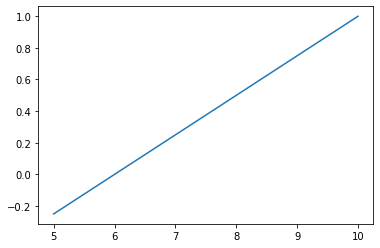

In [37]:
#cfd (Dichtefunktion)
x = np.arange(5, 11)
y = (1/4)*x-(3/2) 
plt.plot(x,y) 
plt.show()

[0.1, 0.2, 0.30000000000000004, 0.5, 0.7, 1.0]


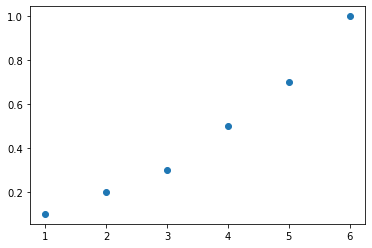

In [38]:
# cfd (verteilungsfunktion)
# x = np.linspace(0, 5, num=5)
x = [1, 2, 3, 4, 5, 6]

y_array = [0.1, 0.1, 0.1, 0.2, 0.2, 0.3]
# y_array = []
# for i in x:
#     # y_array.append((1/4)*i-(3/2))
#     y_array.append(i * 2)

# print(x)
# print(y_array)

sum = []
for i in range(0, len(y_array)):
    sum.append(np.sum(y_array[:i+1]))

print(sum)

plt.scatter(x, sum)
plt.show()